<a href="https://colab.research.google.com/github/venu72561-chinnam/AI-ML-project/blob/main/Lung_CT_Scan_Image_Classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install tensorflow -q

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [9]:
ZIP_FILE_PATH = '/content/archive (3).zip'

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [12]:
import zipfile

with zipfile.ZipFile(ZIP_FILE_PATH, 'r') as zip_ref:
    zip_ref.extractall()

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
IMAGE_SIZE = (128, 128) # You can adjust the image size as needed
BATCH_SIZE = 32 # You can adjust the batch size as needed

In [15]:
train_generator = train_datagen.flow_from_directory(
    '/content/Data/train',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    '/content/Data/test',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 613 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


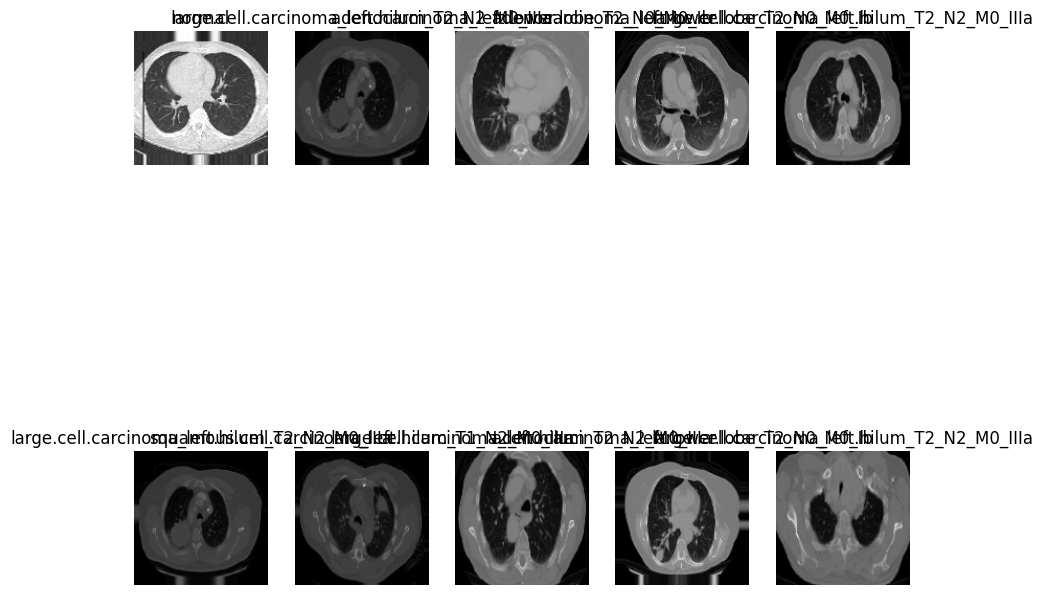

In [16]:
# Get a batch of images and labels from the training generator
images, labels = next(train_generator)

# Get the class names from the generator
class_names = list(train_generator.class_indices.keys())

# Display some images
plt.figure(figsize=(10, 10))
for i in range(min(10, images.shape[0])): # Display up to 10 images from the batch
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])
    # Get the class label for the current image
    label_index = np.argmax(labels[i])
    plt.title(class_names[label_index])
    plt.axis("off")
plt.show()

In [17]:
num_classes = train_generator.num_classes

model = Sequential([
    tf.keras.Input(shape=IMAGE_SIZE + (3,)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,940,868 (49.37 MB)

 Trainable params: 12,940,868 (49.37 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.2620 - loss: 1.8763 - val_accuracy: 0.2540 - val_loss: 1.2923
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.4487 - loss: 1.1858 - val_accuracy: 0.4635 - val_loss: 1.7104
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.5280 - loss: 1.0427 - val_accuracy: 0.5206 - val_loss: 1.1890
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.6093 - loss: 0.8481 - val_accuracy: 0.5143 - val_loss: 1.3205
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.7042 - loss: 0.7253 - val_accuracy: 0.4762 - val_loss: 1.7499
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.6767 - loss: 0.7029 - val_accuracy: 0.5683 - val_loss: 1.4998
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.7562 - loss: 0.6147 - val_accuracy: 0.4286 - val_loss: 2.9355
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.7871 - loss: 0.5051 - val_accuracy: 0.5016 - val_loss:

10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 470ms/step - accuracy: 0.2727 - loss: 6.9684
Validation Loss: 4.4405
Validation Accuracy: 0.4413
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


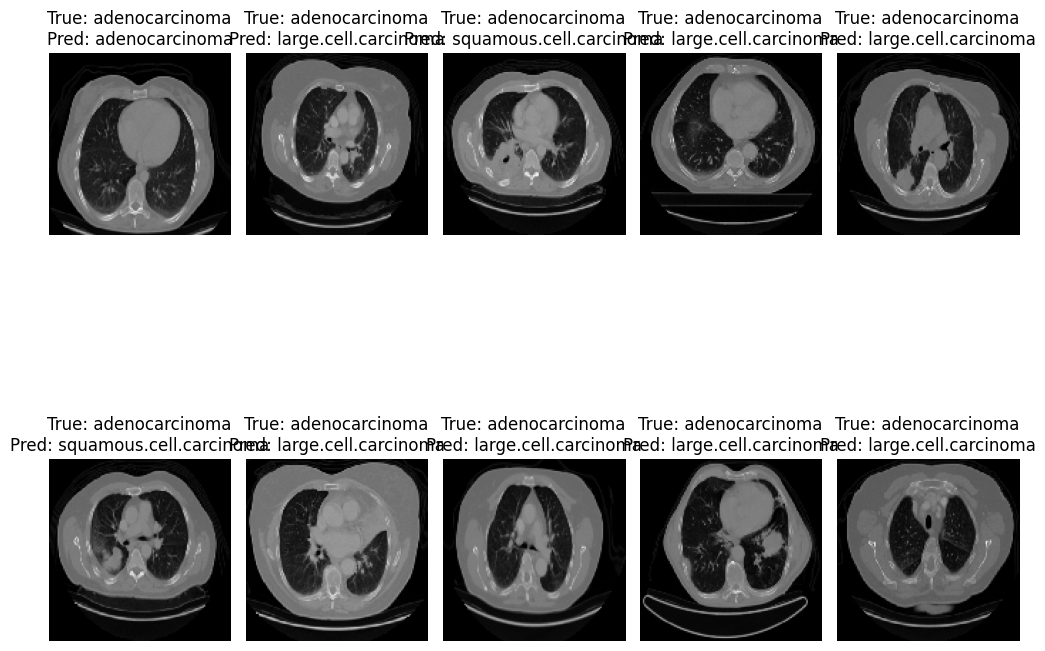

In [20]:
# Evaluate the model on the validation data
loss_and_metrics = model.evaluate(validation_generator)
print(f"Validation Loss: {loss_and_metrics[0]:.4f}")
print(f"Validation Accuracy: {loss_and_metrics[1]:.4f}")

# Get a batch of images and labels from the validation generator for prediction and visualization
test_images, test_labels = next(validation_generator)

# Make predictions on the batch
predictions = model.predict(test_images)

# Get the class names from the generator
class_names = list(validation_generator.class_indices.keys())

# Display images with true and predicted labels
plt.figure(figsize=(10, 10))
for i in range(min(10, test_images.shape[0])): # Display up to 10 images from the batch
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i])
    # Get the true and predicted class labels
    true_label_index = np.argmax(test_labels[i])
    predicted_label_index = np.argmax(predictions[i])
    plt.title(f"True: {class_names[true_label_index]}\nPred: {class_names[predicted_label_index]}")
    plt.axis("off")
plt.tight_layout()
plt.show()